BF매칭시도

In [3]:
# library 가져오기 
import cv2
import matplotlib.pyplot as plt

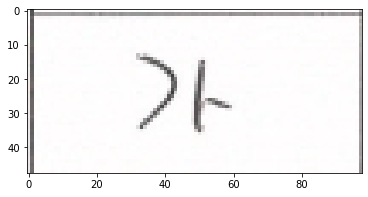

In [4]:
img1 = cv2.imread("./image/kim_ga.jpg")
plt.imshow(img1)

In [5]:
img1 = cv2.imread("./image/kim_width.jpg")
img2 = cv2.imread("./image/park_width.jpg")


img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)


#특징점 찾기 
orb = cv2.ORB_create()


#kp : 특징점 위치, des : 특징점 기술자
kp, des = orb.detectAndCompute(img1, None)


img2 = img1.copy()
for marker in kp:
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt), 
                         markerType=3, markerSize=10, thickness=1,
                         color=(0,0,255))


cv2.imshow("orb",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#이미지 가져오기
img1 = cv2.imread("./image/kim_width.jpg")
img2 = cv2.imread("./image/park_width.jpg")



img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)



#각각의 특징점 찾기 

orb = cv2.ORB_create()


kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)


# 두개의 특징점들 간의 매칭을 계산한다. >> BF매칭 

bf =cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

#매칭도별로 정렬 

matches = sorted(matches, key = lambda x: x.distance) #매칭도는 거리값으로 나옴.

res = cv2.drawMatches(img1_gray,
                      kp1,
                      img2_gray,
                      kp2,
                      matches[:30],
                      None,
                      singlePointColor=(0,255,0),matchColor=(255,0,0),
                      flags=2 #1: 매칭이 안된점도 표시 2: 매칭된 점만 표시
                     )

cv2.imshow("orb", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 매칭하지 못함.